In [10]:
from warnings import simplefilter
simplefilter(action="ignore", category=FutureWarning)

In [11]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA_2D

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/My Drive/data_2d.csv')

df

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


In [13]:
from sklearn.cluster import KMeans

In [114]:
k_means = KMeans(n_clusters=2, random_state=170)

X = np.column_stack((df[df.columns[1]],df[df.columns[-1]]))

In [48]:
k_means.fit(X)

KMeans(n_clusters=2, random_state=170)

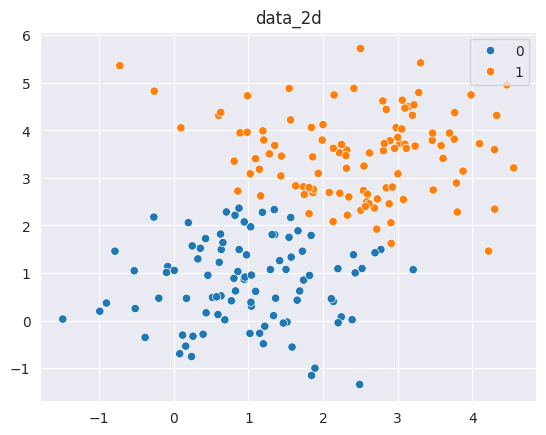

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

y_pred = k_means.predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)
plt.title("data_2d")
plt.show()

In [76]:
elbow_range = range(1, 11)
distortions = []
for k in elbow_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    distortions.append(km.inertia_)

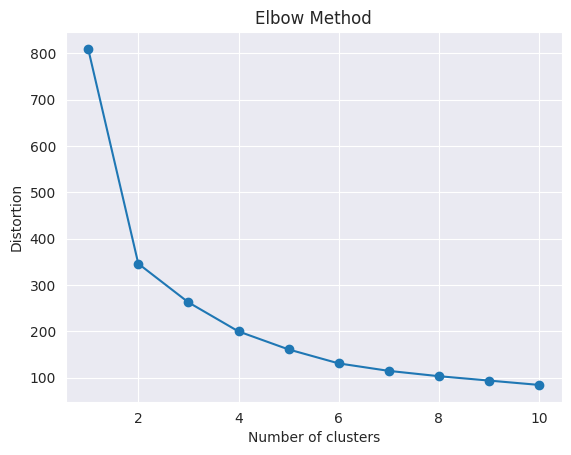

In [77]:
plt.plot(elbow_range, distortions, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.title("Elbow Method")
plt.show()

# MNIST

In [124]:
df2 = pd.read_csv('/content/drive/My Drive/mnist.csv')

df2

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X2_raw = df2[df2.columns[1:]]
y2 = df2[df2.columns[0]]

In [153]:
k_means2 = KMeans(n_clusters=3, random_state=170)

X2 = X2_raw.values

k_means2.fit(X2)

KMeans(n_clusters=3, random_state=170)

In [154]:
y_pred2 = k_means2.predict(X2)

In [158]:
elbow_range2 = range(1, 20)
distortions2 = []
for k in elbow_range2:
    km2 = KMeans(n_clusters=k, random_state=52)
    km2.fit(X2)
    distortions2.append(km2.inertia_)



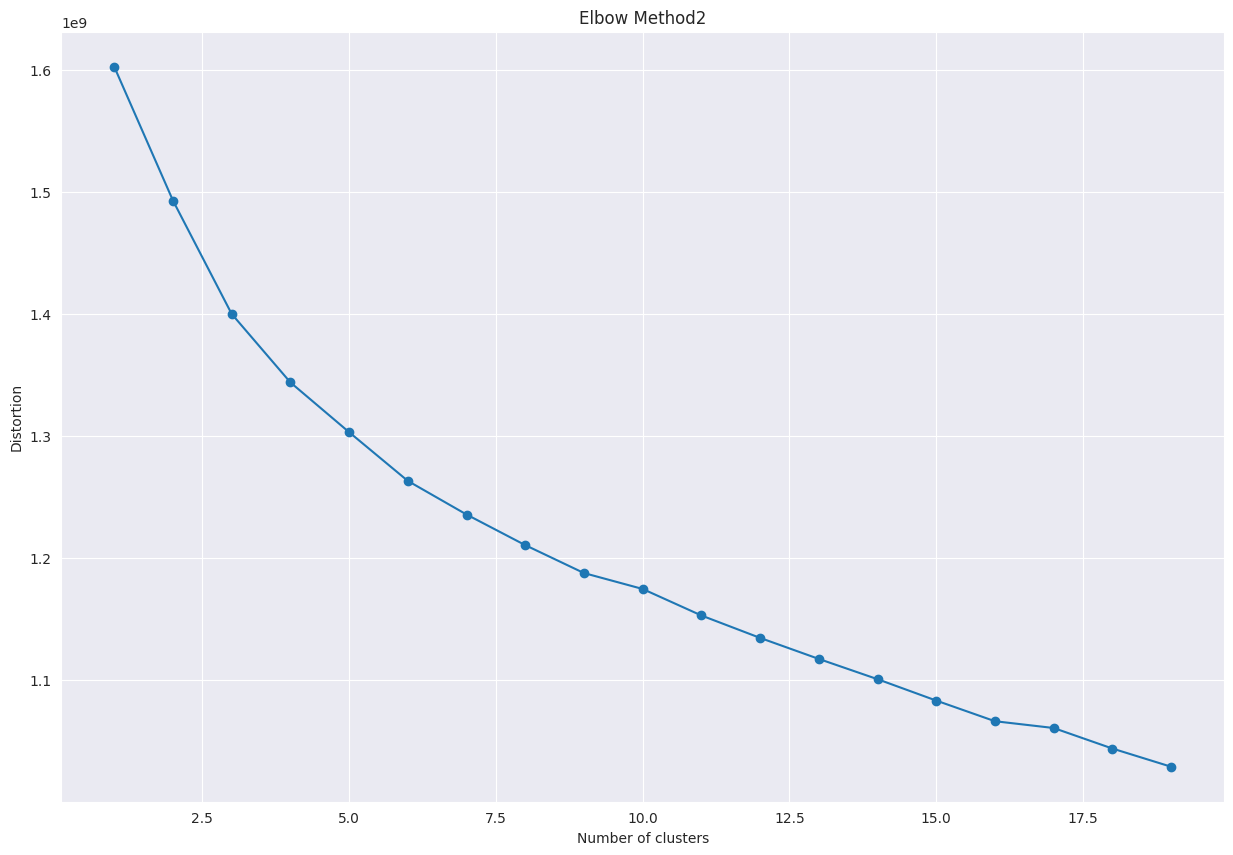

In [159]:
plt.figure(figsize=(15, 10))
plt.plot(elbow_range2, distortions2, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.title("Elbow Method2")
plt.show()



In [166]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X2)

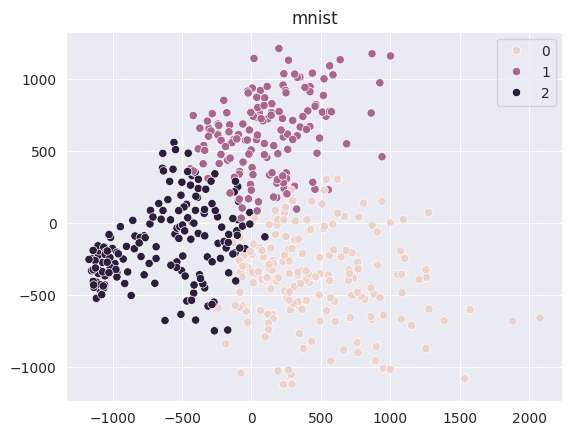

In [167]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred2)
plt.title("mnist")
plt.show()